In [41]:
import pandas as pd
import json 
import seaborn as sns
import time
from datetime import datetime

from matplotlib import pyplot as plt

from src.features.perspective import parse_summary_scores

In [3]:
with open('../data/interim/labeler_sub_dimensions.jsonl', encoding='utf8') as f:
    dims = dict()
    for obj in map(json.loads, f):
        dims.update(obj)
dims_df = pd.DataFrame(dims).T

with open('../data/interim/labeler_sub_conspiracy.jsonl', encoding='utf8') as f:
    consp = dict()
    for obj in map(json.loads, f):
        consp.update(obj)

consp_df=pd.DataFrame.from_dict(consp, orient='index')
consp_df.columns=['conspiracy']

In [4]:
labeler_df = pd.merge(consp_df, dims_df, left_index=True, right_index=True)


In [5]:
len(labeler_df)

560366

In [7]:
labeler_df.head()

,conspiracy,affluence,age,age B,age neutral,edginess,gender,gender B,gender neutral,partisan,partisan B,partisan B neutral,partisan neutral,sociality,time
GallowFroot,0.162281,0.080235,-0.046192,-0.059004,0.493092,0.063367,-0.024410,0.026420,0.431664,0.076811,0.063858,0.416249,0.420440,0.033946,0.124584
lie-twerker,0.334199,-0.078243,-0.052892,-0.016210,0.423090,-0.004301,0.187111,0.211298,0.403782,0.053580,0.105483,0.349728,0.306543,0.138508,0.121835
arduous_raven,0.062335,0.188243,-0.023091,-0.011270,0.521908,0.036400,-0.033094,0.018579,0.441465,0.014570,-0.026937,0.401205,0.440431,0.043603,0.083971
thrawnpop,0.086708,-0.004740,0.022127,0.030912,0.065832,0.017135,0.012276,-0.003803,0.051026,-0.002335,0.010144,0.060803,0.055966,-0.017333,-0.004110
SPACEMANTIMEZ,0.297257,0.162604,0.061887,0.021390,0.519869,0.001225,0.097639,0.090844,0.483203,-0.008656,-0.042643,0.513038,0.491142,-0.039786,0.033664


In [9]:
labeler_df.head()

,conspiracy,affluence,age,age B,age neutral,edginess,gender,gender B,gender neutral,partisan,partisan B,partisan B neutral,partisan neutral,sociality,time
GallowFroot,0.162281,0.080235,-0.046192,-0.059004,0.493092,0.063367,-0.024410,0.026420,0.431664,0.076811,0.063858,0.416249,0.420440,0.033946,0.124584
lie-twerker,0.334199,-0.078243,-0.052892,-0.016210,0.423090,-0.004301,0.187111,0.211298,0.403782,0.053580,0.105483,0.349728,0.306543,0.138508,0.121835
arduous_raven,0.062335,0.188243,-0.023091,-0.011270,0.521908,0.036400,-0.033094,0.018579,0.441465,0.014570,-0.026937,0.401205,0.440431,0.043603,0.083971
thrawnpop,0.086708,-0.004740,0.022127,0.030912,0.065832,0.017135,0.012276,-0.003803,0.051026,-0.002335,0.010144,0.060803,0.055966,-0.017333,-0.004110
SPACEMANTIMEZ,0.297257,0.162604,0.061887,0.021390,0.519869,0.001225,0.097639,0.090844,0.483203,-0.008656,-0.042643,0.513038,0.491142,-0.039786,0.033664


In [ ]:
# sns.pairplot(labeler_df, kind='kde')

In [50]:

with pd.read_json('../data/interim/labeling_contributions_preprocessed_no_bot.jsonl', orient='records', lines=True, chunksize=500) as reader:
    df = pd.concat(chunk[chunk.contribution_type=='comment'][[ 'author', 'created_utc',
           'subreddit','text', 'fullname', 'parent_fullname',
           'link_fullname',]] for chunk in reader)

with open('../data/interim/perspective/labeling_contributions_preprocessed_no_bot_perspective.jsonl', encoding='utf8') as f:
    perspectives = dict()
    for obj in map(json.loads, f):
        k, v = list(obj.items())[0]
        perspectives[k] = parse_summary_scores(v)
perspective_df = pd.DataFrame(perspectives).T


with open('../data/interim/liwc/labeling_contributions_preprocessed_no_bot_liwc.jsonl', encoding='utf8') as f:
    liwcs = dict()
    for obj in map(json.loads, f):
        liwcs.update(obj)
liwc_df = pd.DataFrame(liwcs).T
liwc_df = liwc_df.divide(liwc_df.Tokens, axis=0)
del liwc_df['Tokens']
with open('../data/interim/social_dimensions/labeling_contributions_preprocessed_no_bot_social_dimensions.jsonl', encoding='utf8') as f:
    social_dimensions = dict()
    for obj in map(json.loads, f):
        social_dimensions.update(obj)
social_dimensions_df = pd.DataFrame(social_dimensions).T


df = pd.merge(df, perspective_df, how='left', left_on='fullname', right_index=True)
df = pd.merge(df, social_dimensions_df, how='left', left_on='fullname', right_index=True)
df = pd.merge(df, liwc_df, how='left', left_on='fullname', right_index=True)

del perspective_df, social_dimensions_df, liwc_df,perspectives, liwcs, social_dimensions

In [51]:
df.head()

,author,created_utc,subreddit,text,fullname,parent_fullname,link_fullname,ATTACK_ON_AUTHOR,ATTACK_ON_COMMENTER,FLIRTATION,...,Assent,family,FocusFuture,Ingest,female,feel,Death,Money,home,Filler
16063,martin77,1135966642,reddit.com,would the person who marked this post down\r\n...,t1_c2608,t3_22406,t3_22406,0.103066,0.870031,0.260568,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
16064,madmonky1,1137434271,reddit.com,"&gt;Any other rational person, who isn't too f...",t1_c6146,t1_c6070,t3_27340,0.166237,0.005013,0.226688,...,0.0,0.0,0.012295,0.004098,0.0,0.000000,0.000000,0.000000,0.0,0.0
16065,bigheadarmy,1138919169,reddit.com,"With regard to the blathering, my dismissal co...",t1_c17zz,t1_c17z7,t3_17mn,0.006155,0.006703,0.387258,...,0.0,0.0,0.023973,0.000000,0.0,0.003425,0.006849,0.003425,0.0,0.0
16066,the_seanald,1139327062,reddit.com,What do you say to all these conspiracy theori...,t1_c1bq8,t3_1b0p,t3_1b0p,0.043987,0.737867,0.220544,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
16067,Alex3917,1144197420,reddit.com,Jon Ronson devoted a large part of his book on...,t1_c3xes,t3_3x9b,t3_3x9b,0.474516,0.135797,0.191341,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0


In [56]:
labeler_df.head()

,conspiracy,affluence,age,age B,age neutral,edginess,gender,gender B,gender neutral,partisan,partisan B,partisan B neutral,partisan neutral,sociality,time
GallowFroot,0.162281,0.080235,-0.046192,-0.059004,0.493092,0.063367,-0.024410,0.026420,0.431664,0.076811,0.063858,0.416249,0.420440,0.033946,0.124584
lie-twerker,0.334199,-0.078243,-0.052892,-0.016210,0.423090,-0.004301,0.187111,0.211298,0.403782,0.053580,0.105483,0.349728,0.306543,0.138508,0.121835
arduous_raven,0.062335,0.188243,-0.023091,-0.011270,0.521908,0.036400,-0.033094,0.018579,0.441465,0.014570,-0.026937,0.401205,0.440431,0.043603,0.083971
thrawnpop,0.086708,-0.004740,0.022127,0.030912,0.065832,0.017135,0.012276,-0.003803,0.051026,-0.002335,0.010144,0.060803,0.055966,-0.017333,-0.004110
SPACEMANTIMEZ,0.297257,0.162604,0.061887,0.021390,0.519869,0.001225,0.097639,0.090844,0.483203,-0.008656,-0.042643,0.513038,0.491142,-0.039786,0.033664


In [57]:
pd.merge(labeler_df, df, left_index=True, right_on='author', how='inner')

,conspiracy,affluence,age,age B,age neutral,edginess,gender,gender B,gender neutral,partisan,...,Assent,family,FocusFuture,Ingest,female,feel,Death,Money,home,Filler
179867,0.162281,0.080235,-0.046192,-0.059004,0.493092,0.063367,-0.024410,0.026420,0.431664,0.076811,...,0.0,0.000000,0.031250,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
180874,0.334199,-0.078243,-0.052892,-0.016210,0.423090,-0.004301,0.187111,0.211298,0.403782,0.053580,...,0.0,0.002294,0.011468,0.0,0.002294,0.002294,0.002294,0.006881,0.0,0.0
411964,0.062335,0.188243,-0.023091,-0.011270,0.521908,0.036400,-0.033094,0.018579,0.441465,0.014570,...,0.0,0.000000,0.013158,0.0,0.000000,0.013158,0.000000,0.000000,0.0,0.0
466921,0.086708,-0.004740,0.022127,0.030912,0.065832,0.017135,0.012276,-0.003803,0.051026,-0.002335,...,0.0,0.000000,0.011364,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1023925,0.086708,-0.004740,0.022127,0.030912,0.065832,0.017135,0.012276,-0.003803,0.051026,-0.002335,...,0.0,0.000000,0.010638,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544402,0.126481,0.016303,-0.157465,-0.139481,0.476859,0.047853,0.032111,0.089314,0.386250,0.047334,...,0.0,0.000000,0.076923,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
608006,0.126481,0.016303,-0.157465,-0.139481,0.476859,0.047853,0.032111,0.089314,0.386250,0.047334,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
610561,0.126481,0.016303,-0.157465,-0.139481,0.476859,0.047853,0.032111,0.089314,0.386250,0.047334,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
610563,0.126481,0.016303,-0.157465,-0.139481,0.476859,0.047853,0.032111,0.089314,0.386250,0.047334,...,0.0,0.000000,0.018182,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [58]:
df = pd.merge(labeler_df, df, left_index=True, right_on='author', how='inner')

In [59]:
def truncate_timestamp(timestamp):
    timestamp = datetime.fromtimestamp(float(timestamp))
    truncated_timestamp = time.mktime(timestamp.date().timetuple())
    return truncated_timestamp

In [60]:
df['date'] = df.created_utc.apply(truncate_timestamp)

In [61]:
user_cols = ['conspiracy', 'affluence', 'age', 'gender', 'partisan', ]

In [73]:
for col in user_cols:
    df['qcut_' + col] = pd.qcut(df[col], 2)
qcut_cols = ['qcut_' + col for col in user_cols]

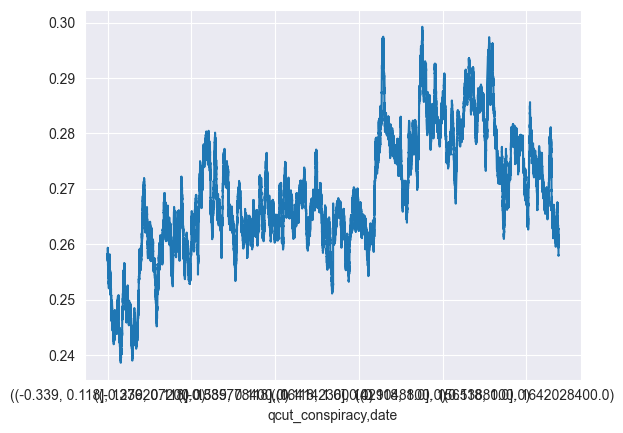

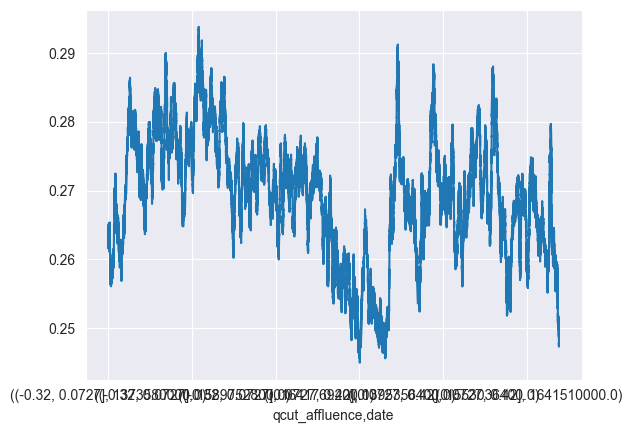

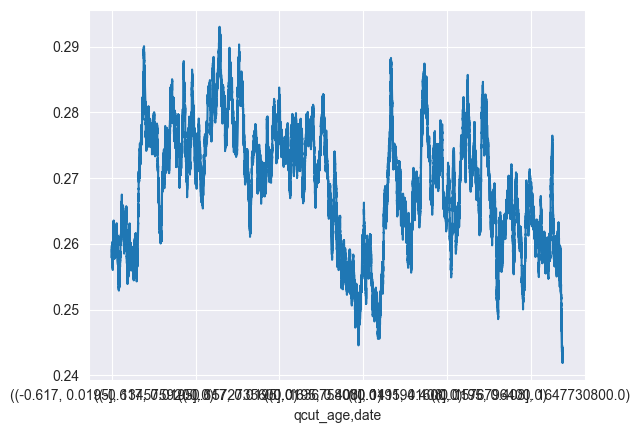

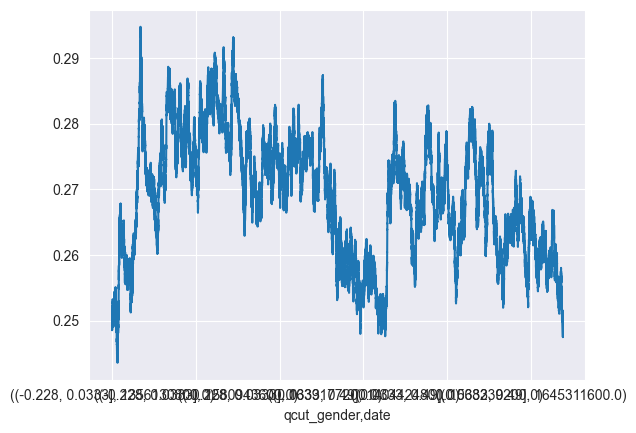

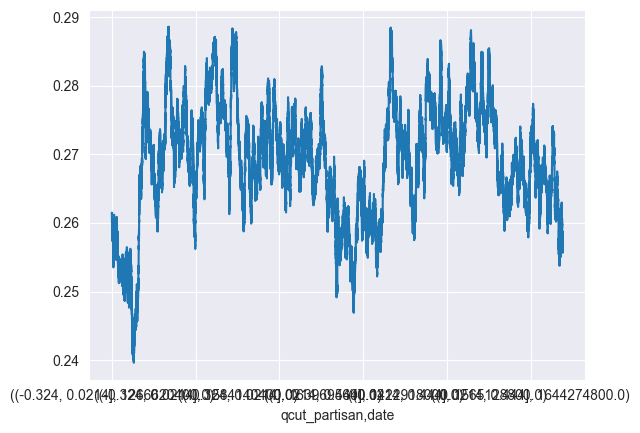

In [74]:
for col in qcut_cols:
    # df[['TOXICITY', 'date'
# ]].set_index('date').sort_index().rolling(window=5000).mean().TOXICITY.dropna().plot()
    df[['TOXICITY', 'date', col]].set_index('date').sort_index().groupby(col).rolling(window=5000).mean().TOXICITY.dropna().plot()
    plt.show()

AttributeError: Line2D.set() got an unexpected keyword argument 'hue'

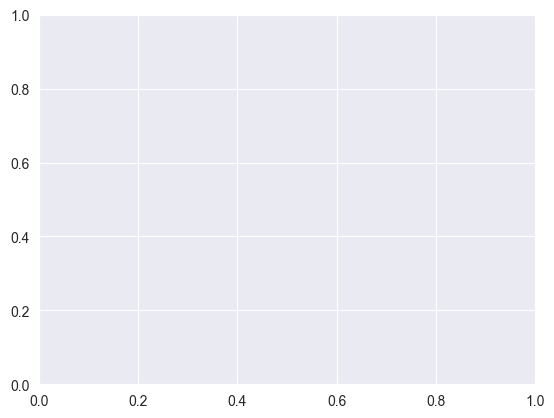

In [77]:
df[['TOXICITY', 'date', 'qcut_partisan'
]].set_index('date').sort_index().groupby(col).rolling(window=5000).mean().dropna().plot(hue='qcut_partisan')

In [65]:
len(df)

1086570